In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import copy

In [2]:
#decide to change from s to i
def choose(q,i, numS, samples):
    p = 1-q**i
    weighted = random.choices(samples, weights = (1-p, p), k=numS)
    return weighted

Network to simulate reedfrost:

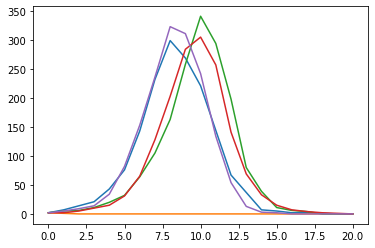

In [22]:
def infect(G, q):
    choices = ['s','i']
    I = []
    R = []
    infected = list(dict( (n,d['val']) for n,d in G.nodes().items() if d['val'] == 'i'))
    for i in range(len(G.nodes)):
        if G.nodes[i]['val'] == 's':
            neighbors = list(G.adj[i]) # find all nodes connected to node i with ['val'] == 'i'
            infectedNeighbors = list(set(neighbors).intersection(set(infected)))
            p = 1-q**len(infectedNeighbors)
            choose = random.choices(choices, weights=(1-p, p), k=1)
            if choose[0] == 'i':
                I.append(i)
        elif G.nodes[i]['val'] == 'i':
            R.append(i)
    return [I, R]

def start(G, n):
    for i in range(n):
        length = len(G.nodes())
        num = random.randrange(length)
        G.nodes[num]['val'] = 'i'

def networkModel():
    #build network and set all to susceptible
    s = 2000
    G = nx.complete_graph(s)

    for i in G:
        G.nodes[i]['val'] = 's'
    numGen = 20
    q = .999
    i = 2

    hist = []
    I = [i]
    start(G,i)
    hist.append(G)

    #infect netwok
    for i in range(numGen):
        output = infect(G,q)
        I.append(len(output[0]))

        for j in output[0]:
            G.nodes[j]['val'] = 'i'
        for r in output[1]:
            G.nodes[r]['val'] = 'r'

    plt.plot(I)

numRep = 5
for i in range(numRep):
    networkModel()

plt.show()

Network with broken ties:

Number of Edges: 1379310
14
Rep: 1
Number of Edges: 1379310
1042
Rep: 2
Number of Edges: 1379310
968
Rep: 3


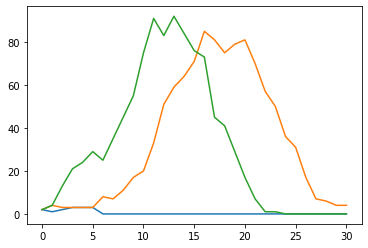

In [55]:
s = 2000


# def graph(G):
#     color_map = []
#     for i in G.nodes:
#         if G.nodes[i]['val'] == 's':
#             color_map.append('blue')
#         elif G.nodes[i]['val'] == 'i': 
#             color_map.append('red')    
#         elif G.nodes[i]['val'] == 'r': 
#             color_map.append('green')  
#     nx.draw(G, node_color=color_map, with_labels=True) 

# def break_edge(num, i, G):
#     #randomly remove edges with a p probability
#     #G.edges is a list of tuples
#     if num+i >= len(G.nodes):
#         dif = len(G.nodes)-(i)-1
#         for j in range(dif):
#             G.remove_edge(i, j+i+1)
#         for j in range(num-dif):
#             G.remove_edge(i, j)
#     else:
#         for j in range(num):
#             G.remove_edge(i, j+i+1)

# def brokenNetworkModel():
#     G = nx.complete_graph(s)
#     p = .7

#     for i in G:
#         G.nodes[i]['val'] = 's'
#     removeRandom(G, p)
#     print(f'Number of Edges: {G.number_of_edges()}')
#     numGen = 20
#     q = .999
#     i = 2

#     hist = []
#     I = [i]
#     for i in range(numGen):
#         hist.append(G)
#         indecesS = list(dict( (n,d['val']) for n,d in G.nodes().items() if d['val'] == 's'))
#         choice = choose(q, I[-1], len(indecesS), ['s','i'])
#         j=0
#         #changes infected to recovered
#         for i in range(len(G.nodes)):
#             if  G.nodes[i]['val'] == 'i':
#                 G.nodes[i]['val'] = 'r'
#         #changes susceptible to infected
#         for i in indecesS:
#             val = G.nodes[i]['val']
            
#             if choice[j] == 'i':
#                 G.nodes[i]['val'] = 'i'
#             j+=1
#         I.append(len(dict( (n,d['val']) for n,d in G.nodes().items() if d['val'] == 'i')))
#     # graph(G)
#     plt.plot(I)

def removeRandom(G, p):
    num = int(len(G.edges)*p)
    i = 0
    while i < num:
        u = random.randint(0, len(G.nodes)-1)
        v = random.randint(0, len(G.nodes)-1)
        if G.has_edge(u,v):
            G.remove_edge(u,v)
            i+=1

def infect(G, q):
    choices = ['s','i']
    I = []
    R = []
    infected = list(dict( (n,d['val']) for n,d in G.nodes().items() if d['val'] == 'i'))
    for i in range(len(G.nodes)):
        if G.nodes[i]['val'] == 's':
            neighbors = list(G.adj[i]) # find all nodes connected to node i with ['val'] == 'i'
            infectedNeighbors = list(set(neighbors).intersection(set(infected)))
            p = 1-q**len(infectedNeighbors)
            choose = random.choices(choices, weights=(1-p, p), k=1)
            if choose[0] == 'i':
                I.append(i)
        elif G.nodes[i]['val'] == 'i':
            R.append(i)
    return [I, R]

def start(G, n):
    for i in range(n):
        length = len(G.nodes())
        num = random.randrange(length)
        G.nodes[num]['val'] = 'i'

def brokenNetworkModel():
    #build network and set all to susceptible
    s = 2000
    p = .31 #change prob here --------------
    G = nx.complete_graph(s)   
    for i in G:
        G.nodes[i]['val'] = 's'
    removeRandom(G, p)
    print(f'Number of Edges: {G.number_of_edges()}')

    numGen = 30
    q = .999
    i = 2

    hist = []
    I = [i]
    start(G,i)
    hist.append(G)

    #infect netwok
    for i in range(numGen):
        output = infect(G,q)
        I.append(len(output[0]))

        for j in output[0]:
            G.nodes[j]['val'] = 'i'
        for r in output[1]:
            G.nodes[r]['val'] = 'r'

    plt.plot(I)
    print(sum(I))

numRep = 3
for i in range(numRep):
    brokenNetworkModel()
    print(f'Rep: {i+1}')

plt.show()